In [61]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import ScalarFormatter
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import missingno as msno
import seaborn as sns
%matplotlib inline

# SET UP

Project with Mohit Katyal, Jessica Cherny, Richard Cai

We chose the School System Finances dataset as our dataset to focus on. We would like to see the relationship between source of funding (Federal, State, Local) and the types of programs that each of them tend to focus more on. For examples, does the state goverment support funding for special education programs, or is that more handled by the federal government?
We will explore this relationship further.

In [2]:
finances = pd.read_csv("elsec15.csv", index_col = False)

C:\Users\Richard\Anaconda3\envs\DSD\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Inspection

In [3]:
finances.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


Check to make sure data doesn't have missing values. Looks like our data is all filled in (doesn't look like there are missing values).

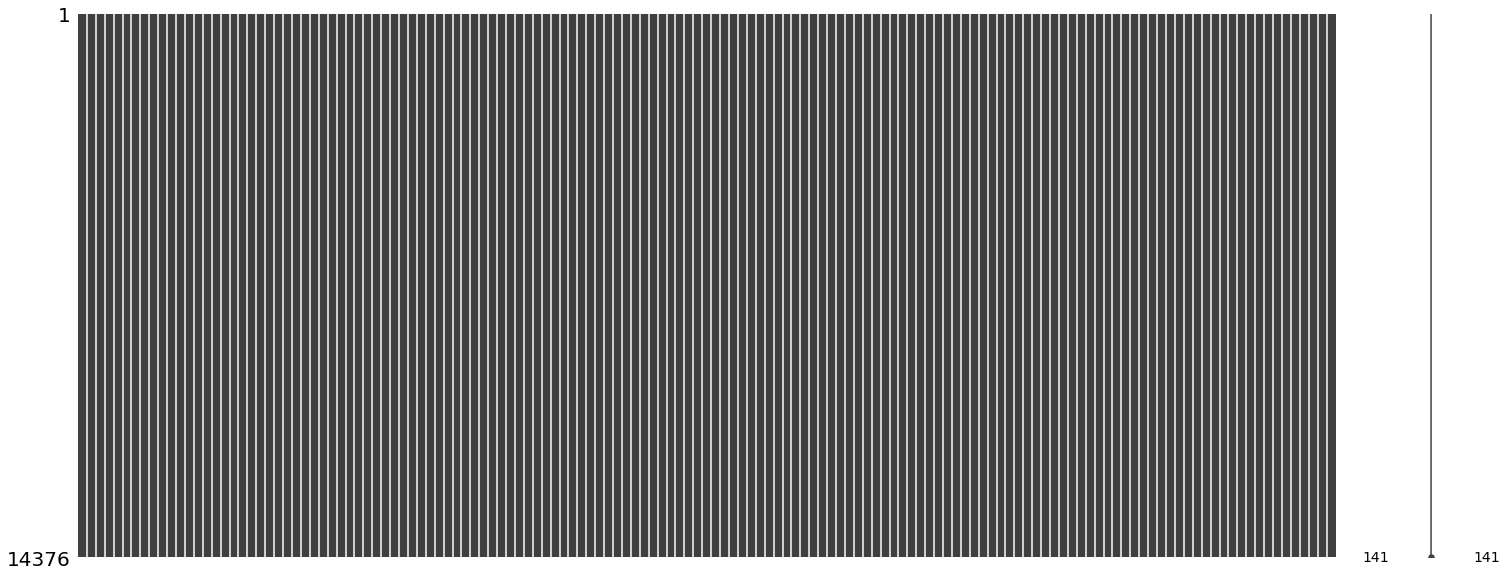

In [4]:
msno.matrix(finances)

In [5]:
finances.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


# Cleaning and Organizing


Documentation reveals that only schools with school level 1, 2, 3, and 5 actually provide education, so we will filter out non school entities 

In [6]:
school_finances = finances[(finances['SCHLEV'] <= 5)&(finances['SCHLEV'] != 4)]

Removing documentation data or overly specific identification data that can't be used for any valuable analysis

In [7]:
school_finances.drop(['IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'NCESID', 'YRDATA', 'V33'], axis=1, inplace=True)

C:\Users\Richard\Anaconda3\envs\DSD\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
school_finances.head()

,STATE,SCHLEV,TOTALREV,TFEDREV,C14,C15,C16,C17,C19,B11,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,3,79665,7574,1791,2179,259,202,106,19,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,3,330317,23602,5729,7207,811,882,350,190,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,3,10519,2518,1279,323,153,1,37,0,...,0,8024,0,304,7720,0,0,0,0,646
3,1,3,26076,3374,1035,596,139,1,42,15,...,0,0,0,0,0,0,0,0,2054,7478
4,1,3,31825,3586,856,980,220,166,51,0,...,0,22155,0,1190,20965,0,0,1397,790,5400


# Visualization

Let's take a look at differences in average revenue for various states in the south:

In [9]:
southern_states_indices = [5, # Alabama 
                          11, # Georgia
                          25, # Mississippi
                          34, # North Carolina
                          41 # South Carolina
                          ]

southern_states_names = ["Alabama", "Georgia", "Mississippi", "North Carolina", "South Carolina"]

southern_states = school_finances[school_finances['STATE'].isin(southern_states_indices)]
print(set(southern_states['STATE']))

{34, 5, 41, 11, 25}


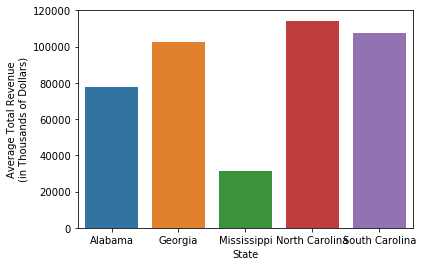

In [70]:
totalrevplot = sns.barplot(southern_states_names, southern_states.groupby('STATE')['TOTALREV'].mean())
totalrevplot.set(xlabel="State", ylabel="Average Total Revenue\n(in Thousands of Dollars)")

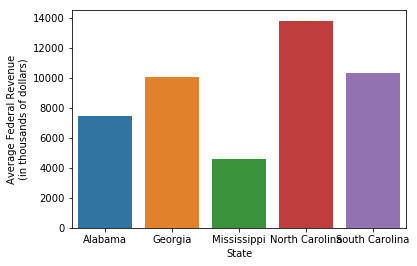

In [71]:
totalrevplot = sns.barplot(southern_states_names, southern_states.groupby('STATE')['TFEDREV'].mean())
totalrevplot.set(xlabel="State", ylabel="Average Federal Revenue\n(in thousands of dollars)")

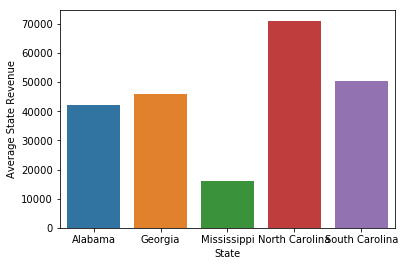

In [12]:
totalrevplot = sns.barplot(southern_states_names, southern_states.groupby('STATE')['TSTREV'].mean())
totalrevplot.set(xlabel="State", ylabel="Average State Revenue")

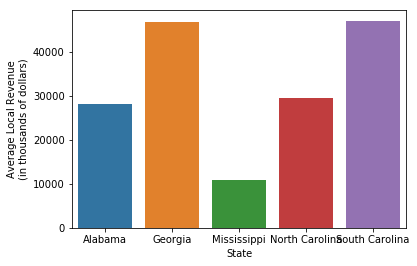

In [72]:
totalrevplot = sns.barplot(southern_states_names, southern_states.groupby('STATE')['TLOCREV'].mean())
totalrevplot.set(xlabel="State", ylabel="Average Local Revenue\n(in thousands of dollars)")

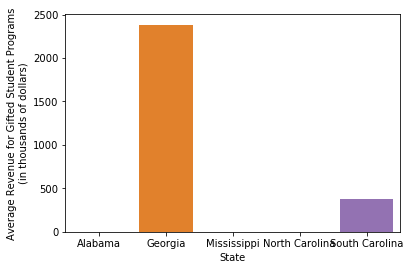

In [73]:
totalrevplot = sns.barplot(southern_states_names, southern_states.groupby('STATE')['C08'].mean())
totalrevplot.set(xlabel="State", ylabel="Average Revenue for Gifted Student Programs\n(in thousands of dollars)")

Now let's look at how total revenue is related to various spending initiatives

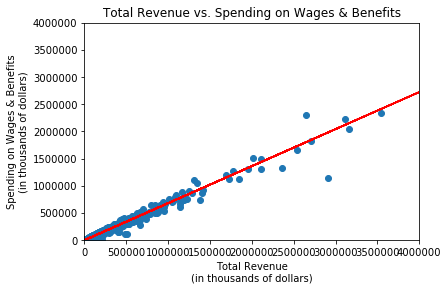

In [98]:
trev = school_finances['TOTALREV']
wages_benefits = school_finances['Z32'] + school_finances['Z34']
rev_wage_predictor = sm.OLS(wages_benefits, trev).fit()
plt.xlim(xmax=0.4e7)
plt.ylim(ymax=0.4e7)
plt.plot(trev, rev_wage_predictor.predict(trev), color = 'red')
plt.scatter(trev, wages_benefits)
plt.title("Total Revenue vs. Spending on Wages & Benefits")
plt.xlabel("Total Revenue\n(in thousands of dollars)")
plt.ylabel("Spending on Wages & Benefits\n(in thousands of dollars)")
plt.show()

**Needs some validation**

In [116]:
train_cutoff = int(0.8*len(school_finances))
shuffled_schools = school_finances.sample(frac=1)
rev_wage_train = shuffled_schools[0:train_cutoff]
wage_train = rev_wage_train['Z32'] + rev_wage_train['Z34']
rev_wage_validate = shuffled_schools[train_cutoff:]
wage_validate = rev_wage_validate['Z32'] + rev_wage_validate['Z34']

**Regression amt spent on wages and benefits on total revenue**

In [119]:
wage_train_predicted = rev_wage_predictor.predict(rev_wage_train['TOTALREV'])
residuals_train = wage_train - wage_train_predicted
mse_train = 1/train_cutoff * np.linalg.norm(residuals_train)**2
wage_validate_predicted = rev_wage_predictor.predict(rev_wage_validate['TOTALREV'])
residuals_validate = wage_validate - wage_validate_predicted
mse_validate = 1/(len(school_finances)-train_cutoff) * np.linalg.norm(residuals_validate)**2
print(mse_train/mse_validate)

3.26286990486


In [87]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_squared = r_value**2
r_squared

0.99478415605550885

**Regression amt spent on math and sciences on total revenue**

In [35]:
x = finances_df['TOTALREV']
y_2 = finances_df['C16']

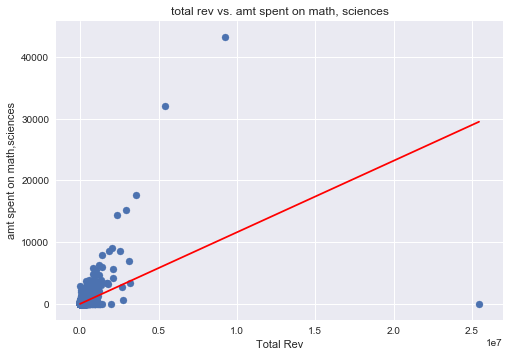

In [36]:
plt.figure(1)
myOLS_1 = sm.OLS(y_2, x).fit()
plt.plot(x, myOLS_1.predict(x), color = 'red')
plt.scatter(x, y_2)
plt.title("total rev vs. amt spent on math, sciences")
plt.xlabel("Total Rev")
plt.ylabel("amt spent on math,sciences")
plt.show()
plt.close()

In [89]:
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x,y_2)
r_squared_2 = r_value_2**2
r_squared_2

0.23888973124917584

Not such a good model! Our correlation coefficient is small due to the effect of outliers and thus increases our RMSE. It may not be the best idea to use a linear regression on it.

**School lunch revenue vs. gifted and talented programs rev**

In [37]:
gift_tal_spend = finances_df['C08']
school_lunch_rev = finances_df['A09']  

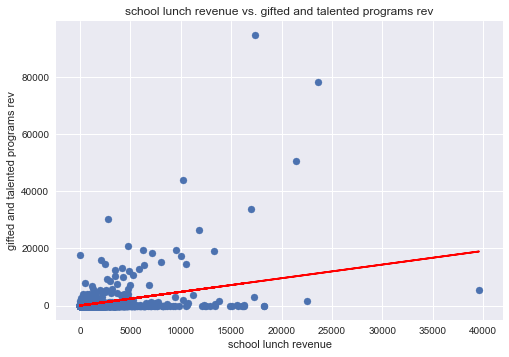

In [38]:
plt.figure(1)
myOLS_1 = sm.OLS(gift_tal_spend, school_lunch_rev).fit()
plt.plot(school_lunch_rev, myOLS_1.predict(school_lunch_rev), color = 'red')
plt.scatter(school_lunch_rev, gift_tal_spend)
plt.title("school lunch revenue vs. gifted and talented programs rev")
plt.xlabel("school lunch revenue")
plt.ylabel("gifted and talented programs rev")
plt.show()
plt.close()

I actually expected this to be an inverse relationship. Usually if you have more money allocated towards school lunch programs, this may indicate that the school has more lower-income students to support. If you have a realtively high number of low-income students, this can sometimes mean that certain schools with a high number of low-income students would have less gifted and talented programs because those programs are expensive and because low-income students often do not have the resources to excel in these types of classes.

In [92]:
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(gift_tal_spend , school_lunch_rev)
r_squared_3 = r_value_3**2
r_squared_3

0.15614096202092206

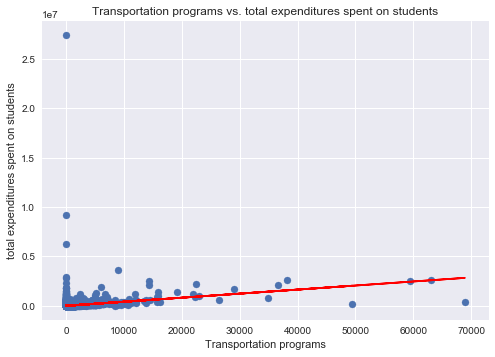

In [107]:
#U11 Sale of property vs. spending on students (TOTALEXP)
prop_sale = school_finances['C12'] #x
total_exp = school_finances['TOTALEXP']  #y
myOLS_1 = sm.OLS(total_exp, prop_sale).fit()
plt.plot(prop_sale, myOLS_1.predict(prop_sale), color = 'red')
plt.scatter(prop_sale, total_exp)
plt.title("Transportation programs vs. total expenditures spent on students")
plt.xlabel("Transportation programs")
plt.ylabel("total expenditures spent on students")
plt.show()

In [93]:
slope_4, intercept_4, r_value_4, p_value_4, std_err_4 = stats.linregress(prop_sale, total_exp)
r_squared_4 = r_value_4**2
r_squared_4

0.042845481381993962

Let's look at the distribution of total revenue for each school

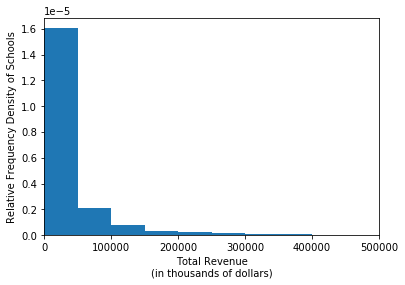

In [93]:
binlist = np.arange(0,1e6+1,5e4)
yfmt = ScalarFormatter()
yfmt.set_powerlimits((-4,-4))
plt.xlim(xmax=5e5)
plt.xlabel('Total Revenue\n(in thousands of dollars)')
plt.ylabel('Relative Frequency Density of Schools')
plt.hist(school_finances['TOTALREV'],bins=binlist,normed=True)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.show()

* Because the y-axis uses a relative frequency density, to get the relative frequency of each bin, simply divide the density coefficient by half. For instance, the relative frequency of schools that take less than 50 million is 1.6/2 = 0.8 

Given this, let's take a look at the differences in targeting funding among the various income levels of schools

In [95]:
sorted_finances = school_finances.sort_values('TOTALREV')
num_schools = len(sorted_finances)
bottom_schools = sorted_finances[0: num_schools//3]
middle_schools = sorted_finances[num_schools//3 : 2*num_schools//3]
top_schools = sorted_finances[2*num_schools//3 :]

In [40]:

# C15 Federal revenue through the state - Children with disabilities - IDEA
# C16 Federal revenue through the state - Math, science, and teacher quality
# C17 Federal revenue through the state - Safe and drug-free schools
# C19 Federal revenue through the state - Vocational and technical education
# B11 Federal revenue through the state - Bilingual education
# C25 Federal revenue through the state - Child nutrition programs

# C05 Special education programs
# C06 Compensatory and basic skills attainment programs
# C07 Bilingual education programs
# C08 Gifted and talented programs
# C09 Vocational education programs 
# C10 School lunch programs
# C12 Transportation programs 
def state_catagory_percentages(df):
    c5 = sum(df['C05'])
    c6 = sum(df['C06'])
    c7 = sum(df['C07'])
    c8 = sum(df['C08'])
    c9 = sum(df['C09'])
    c10 = sum(df['C10'])
    c12 = sum(df['C12'])

    # Data to plot
    labels = ['Special education programs', 'Compensatory and basic skills attainment programs', 
    'Bilingual education programs', 'Gifted and talented programs', 'Vocational education programs',
    'School lunch programs', 'Transportation programs']

    sizes = [c5, c6, c7, c8, c9, c10, c12]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red', 'green']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

# Bottom schools focus more on vocation education and transportation

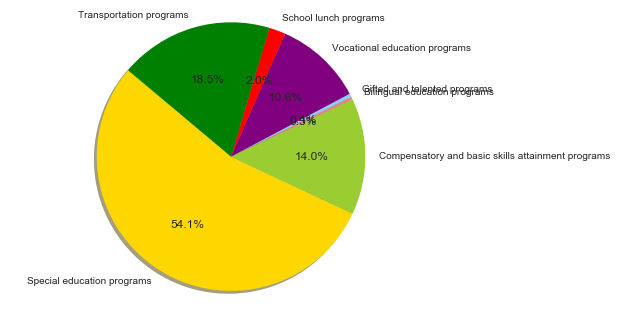

In [41]:
state_catagory_percentages(bottom_schools)

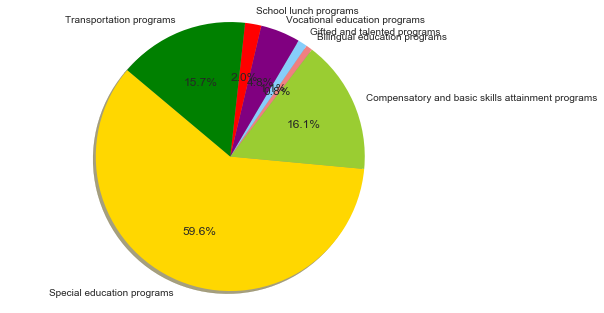

In [42]:
state_catagory_percentages(middle_schools)

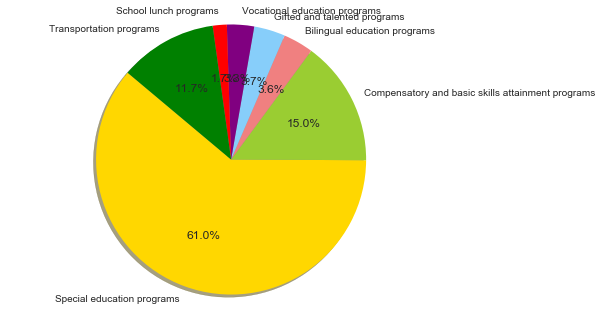

In [43]:
state_catagory_percentages(top_schools)

In [44]:
# C15 Federal revenue through the state - Children with disabilities - IDEA 
# C16 Federal revenue through the state - Math, science, and teacher quality 
# C17 Federal revenue through the state - Safe and drug-free schools 
# C19 Federal revenue through the state - Vocational and technical education 
# B11 Federal revenue through the state - Bilingual education 
# C25 Federal revenue through the state - Child nutrition programs 

def federal_catagory_percentages(df):
    c15 = sum(df['C15'])
    c16 = sum(df['C16'])
    c17 = sum(df['C17'])
    c19 = sum(df['C19'])
    b11 = sum(df['B11'])
    c25 = sum(df['C25'])

    # Data to plot
    labels = ['Children with disabilities - IDEA', 'Math, science, and teacher quality', 
    'Safe and drug-free schools', 'Vocational and technical education', 'Bilingual education',
    'Child nutrition programs']

    sizes = [c15, c16, c17, c19, b11, c25]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple','green']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

# Bottom Schools focus less on their nutrion programs and more on their vocation and teach quality programs. Also a bit confusing because I would expect schools where many kids don't speak english to have more money in their bilingual programs.

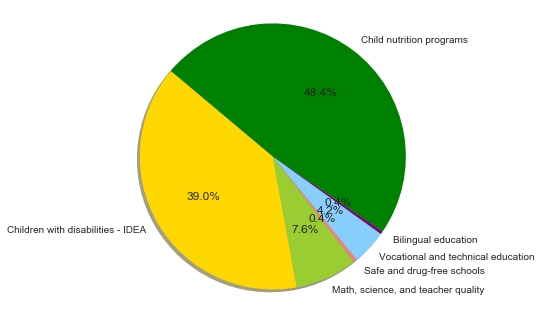

In [45]:
federal_catagory_percentages(bottom_schools)

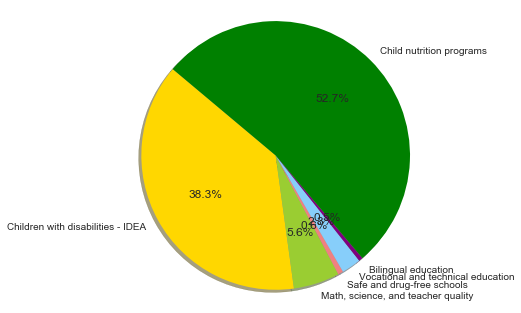

In [46]:
federal_catagory_percentages(middle_schools)

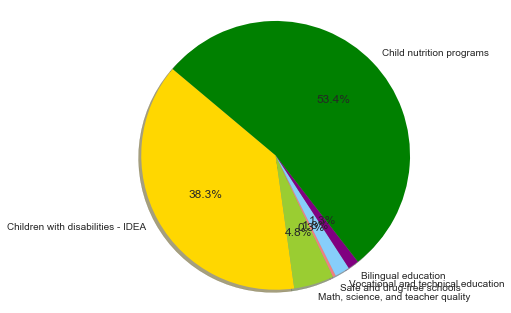

In [47]:
federal_catagory_percentages(top_schools)

# Logistic regression classifying whether a school is a top school or not based upon how much they spend on gifted and talented programs and bilingual educaiton. 


In [48]:
#Train the dataset using
    #Bottom Schools and Middle Schools - Label not Top
    #Rich Schools - Label top
    #Train both based upon what percentage of their state funding goes to bilingual programs 
        #For each school, pass in an array that looks like this
            #School[B11]/School[TotalRev]
            #Tag

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

top_labels_array     = np.full(len(top_schools), 1)
not_top_labels_array = np.full(len(middle_schools), 0)

#Create Test and Train Data from the three different schools
TopXTrain, TopXTest, TopYTrain, TopYTest = train_test_split(top_schools, top_labels_array, train_size = 0.6, test_size = 0.4)
MiddleXTrain, MiddleXTest, MiddleYTrain, MiddleYTest = train_test_split(middle_schools, not_top_labels_array, train_size = 0.6, test_size = 0.4)
BottomXTrain, BottomXTest, BottomYTrain, BottomYTest = train_test_split(bottom_schools, not_top_labels_array, train_size = 0.6, test_size = 0.4)


#Array of Top, Bottom, and Middle school percentages
def percent_bilingual(finance_df): 
    student_spending_array = sum([finance_df['C15'], finance_df['C16'], finance_df['C17'], 
                                  finance_df['C19'], finance_df['B11'], finance_df['C25']])
    
    bilingual_spending_array = finance_df['B11']
    percent_bilingual_array = np.divide(bilingual_spending_array, student_spending_array)
    
    return percent_bilingual_array.dropna()


#Train the DataSet with our percentages
top_bilingual_train    = percent_bilingual(TopXTrain)
middle_bilingual_train = percent_bilingual(MiddleXTrain)
bottom_bilingual_train = percent_bilingual(BottomXTrain)
X_train = np.concatenate((top_bilingual_train, middle_bilingual_train, bottom_bilingual_train))
y_train = np.concatenate((TopYTrain[:len(top_bilingual_train)] , 
                        MiddleYTrain[:len(middle_bilingual_train)] , 
                        BottomYTrain [:len(bottom_bilingual_train)] ))
X_train = X_train.reshape(len(X_train), 1)
y_train = y_train.reshape(len(y_train), 1)

LR = LogisticRegression(class_weight = 'balanced', dual = True)
LR.fit(X_train, y_train) 

#Test the Dataset with out percentages

top_bilingual_test    = percent_bilingual(TopXTest)
middle_bilingual_test = percent_bilingual(MiddleXTest)
bottom_bilingual_test = percent_bilingual(BottomXTest)
X_test = np.concatenate((top_bilingual_test, middle_bilingual_test,bottom_bilingual_test))
y_test = np.concatenate((TopYTest[:len(top_bilingual_test)] , 
                         MiddleYTest[:len(middle_bilingual_test)] , 
                         BottomYTest [:len(bottom_bilingual_test)] ))

X_test = X_test.reshape(len(X_test), 1)
y_test = y_test.reshape(len(y_test), 1)


print("We can classify a school based upon how much it spends on bilingual education by ", LR.score(X_test,y_test) )


In [ ]:
bottom_schools